# Directing customers to subscription through app behavior analysis

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


In [107]:
df= pd.read_csv('C:/Users/SIDY BOY!/Desktop/UTD/Projects/practicing ML/appdata10.csv')

In [108]:
df

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,2013-05-09 13:46:17.871,3,13:00:00,32,"Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...",13,0,0,1,2013-05-09 13:47:52.875,0
49996,169179,2013-04-09 00:05:17.823,1,00:00:00,35,"Cycle,Splash,Home,RewardsContainer",4,0,1,0,NaN,0
49997,302367,2013-02-20 22:41:51.165,2,22:00:00,39,"joinscreen,product_review,product_review2,Scan...",25,0,0,0,NaN,0
49998,324905,2013-04-28 12:33:04.288,6,12:00:00,27,"Cycle,Home,product_review,product_review,produ...",26,0,0,1,2013-04-28 12:35:38.709,0


In [109]:
df.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [110]:
df.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [111]:
df['hour']= df['hour'].str.slice(1,3).astype(int)

In [112]:
df1= df.copy().drop(columns=['user','first_open','screen_list','enrolled_date'])

In [113]:
df1

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked
0,3,2,23,15,0,0,0,0
1,6,1,24,13,0,0,0,0
2,1,19,23,3,0,1,0,1
3,4,16,28,40,0,0,1,0
4,1,18,31,32,0,0,1,1
...,...,...,...,...,...,...,...,...
49995,3,13,32,13,0,0,1,0
49996,1,0,35,4,0,1,0,0
49997,2,22,39,25,0,0,0,0
49998,6,12,27,26,0,0,1,0


KeyboardInterrupt: 

<Figure size 1440x1080 with 0 Axes>

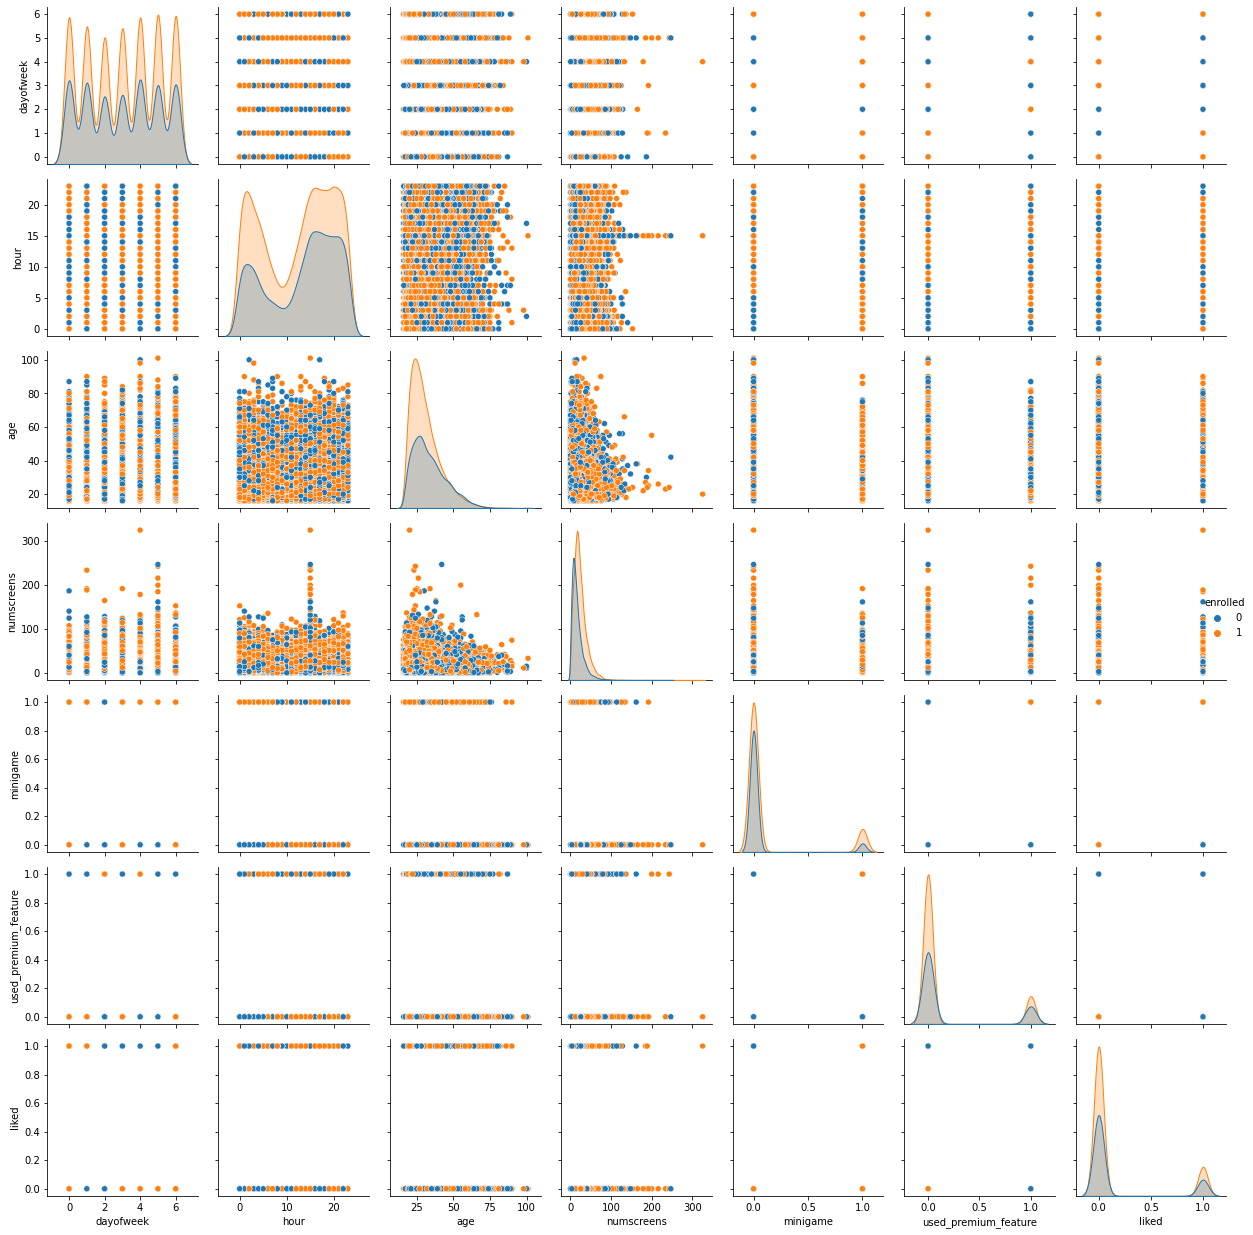

In [99]:
plt.figure(figsize=(20,15))
sns.pairplot(df1, hue='enrolled', vars=['dayofweek','hour','age','numscreens','minigame','used_premium_feature','liked'])

<Figure size 432x288 with 0 Axes>

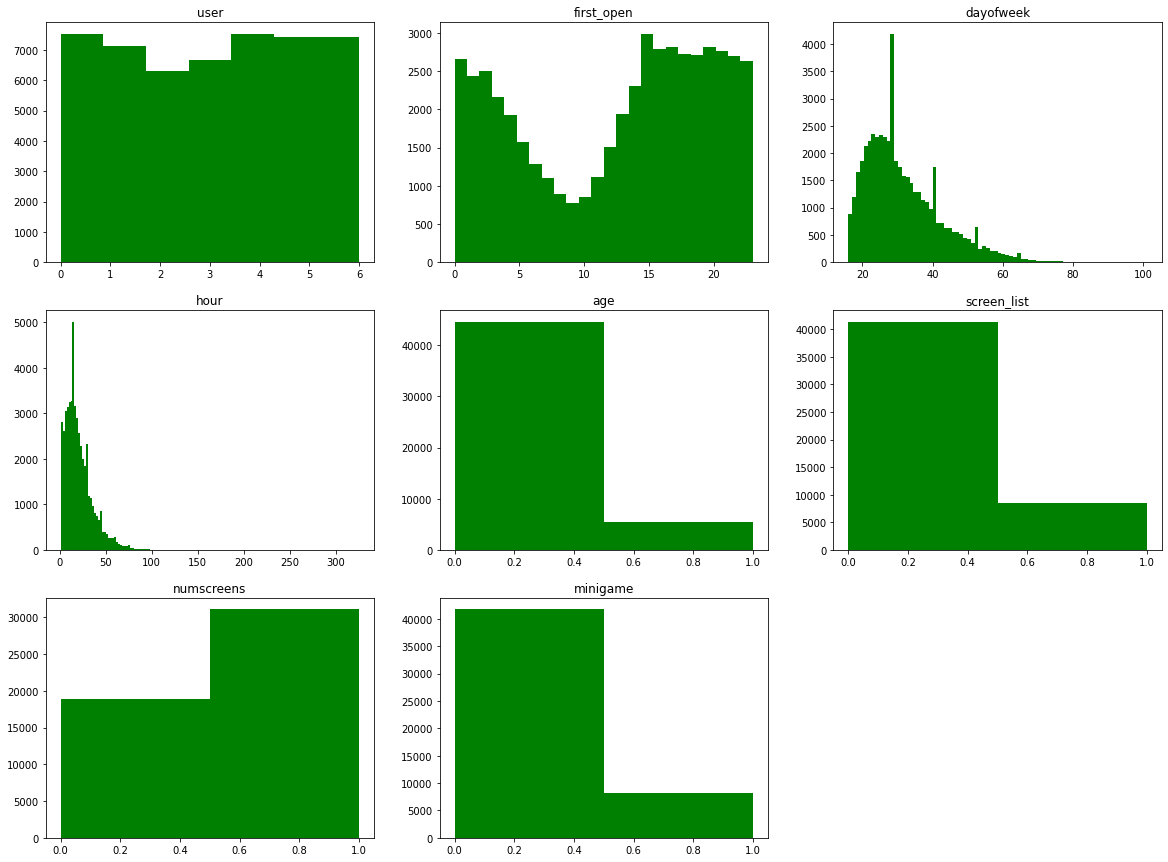

In [114]:
plt.suptitle('Histograms of Numerical columns', fontsize= 20)
plt.figure(figsize=(20,15) )
for i in range(1, df1.shape[1]+1):
    plt.subplot(3,3,i)
    f=plt.gca()
    f.set_title(df.columns.values[i-1])
    vals= np.size(df1.iloc[:,i-1].unique())
    plt.hist(df1.iloc[:,i-1],bins=vals, color= 'green')

In [115]:
correlation= df1.corrwith(df1.enrolled)

correlation

dayofweek               0.011326
hour                   -0.066694
age                    -0.131303
numscreens              0.209457
minigame                0.104979
used_premium_feature   -0.052703
enrolled                1.000000
liked                  -0.007022
dtype: float64

In [116]:
df1_without_enrolled= df1.drop(columns=['enrolled'])


<AxesSubplot:title={'center':'Correlation of columns with Target Column("Enrolled")'}>

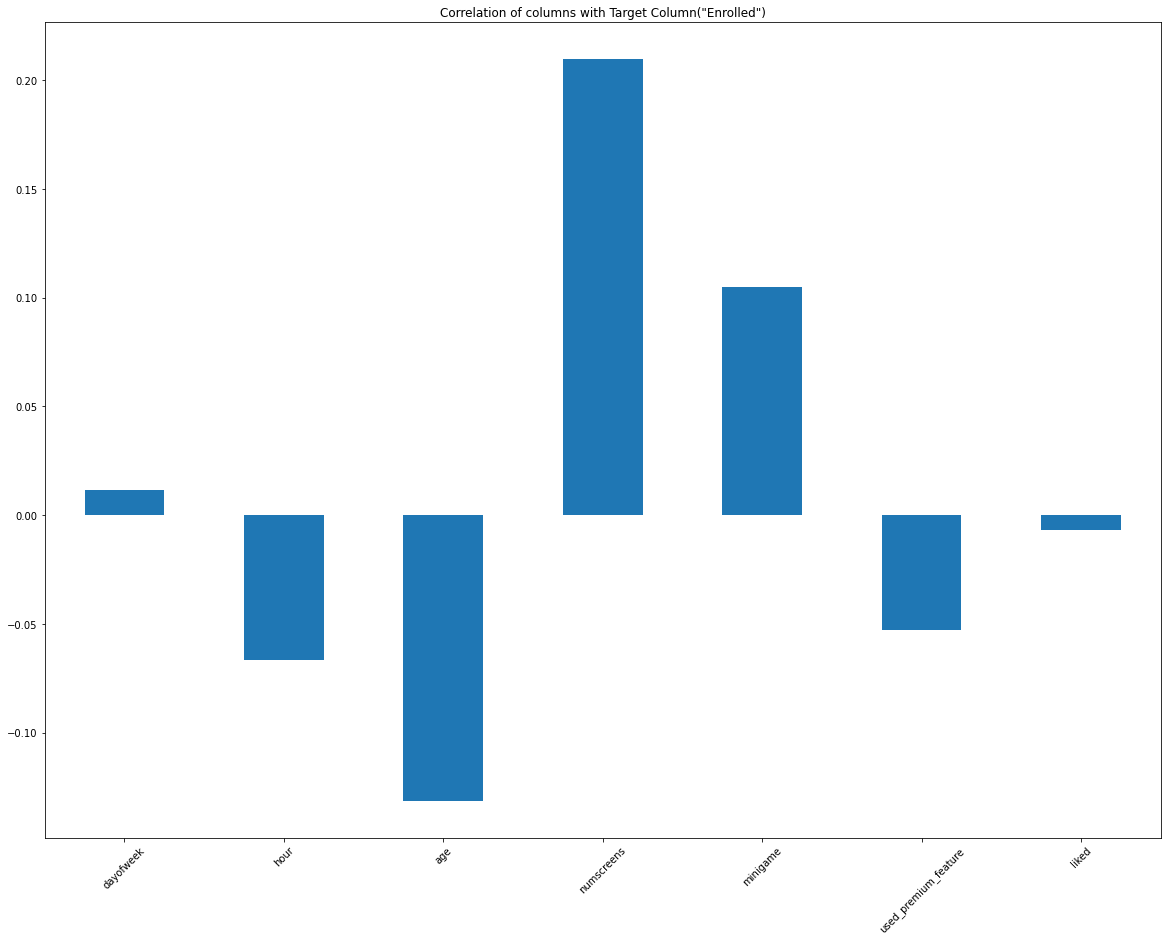

In [117]:
df1_without_enrolled.corrwith(df1.enrolled).plot.bar(figsize=(20,15),rot=45, title= 'Correlation of columns with Target Column("Enrolled")')


<AxesSubplot:>

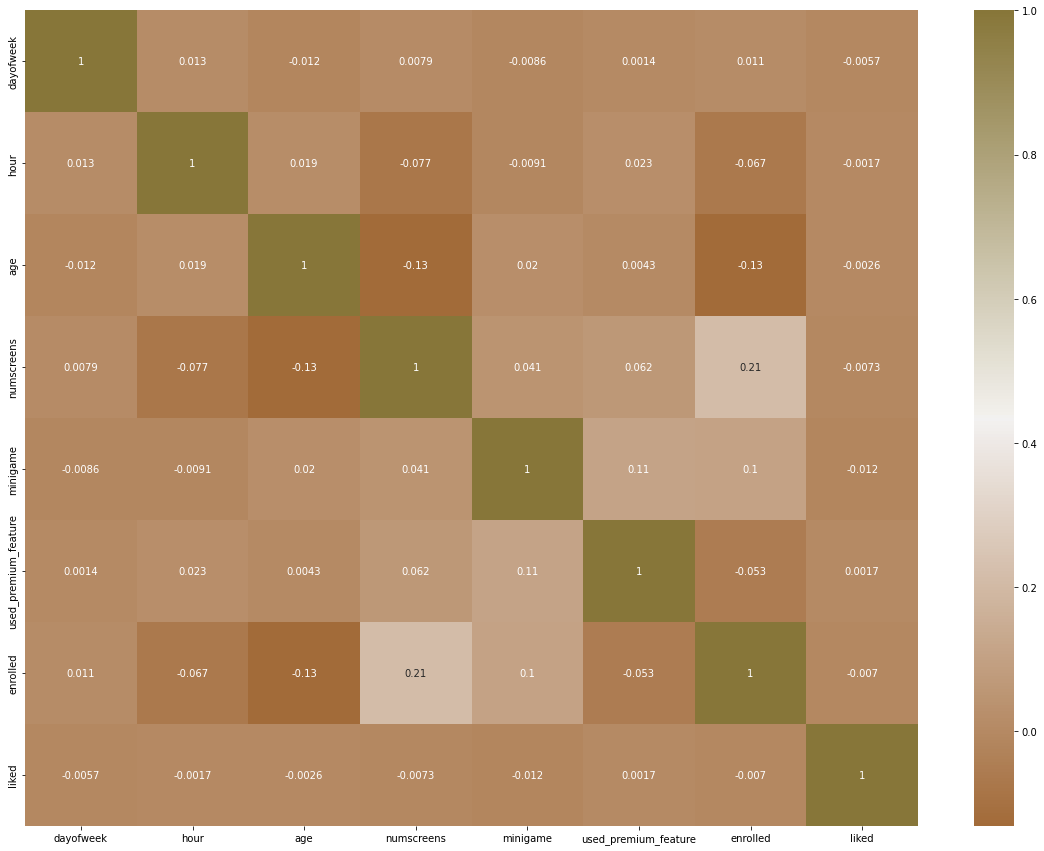

In [84]:
corr=df1.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr,annot=True, cmap=sns.diverging_palette(40,70,as_cmap=True))

# feature engineering

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   user                  50000 non-null  int64 
 1   first_open            50000 non-null  object
 2   dayofweek             50000 non-null  int64 
 3   hour                  50000 non-null  int32 
 4   age                   50000 non-null  int64 
 5   screen_list           50000 non-null  object
 6   numscreens            50000 non-null  int64 
 7   minigame              50000 non-null  int64 
 8   used_premium_feature  50000 non-null  int64 
 9   enrolled              50000 non-null  int64 
 10  enrolled_date         31074 non-null  object
 11  liked                 50000 non-null  int64 
dtypes: int32(1), int64(8), object(3)
memory usage: 4.4+ MB


In [119]:
df['first_open']

0        2012-12-27 02:14:51.273
1        2012-12-02 01:16:00.905
2        2013-03-19 19:19:09.157
3        2013-07-05 16:08:46.354
4        2013-02-26 18:50:48.661
                  ...           
49995    2013-05-09 13:46:17.871
49996    2013-04-09 00:05:17.823
49997    2013-02-20 22:41:51.165
49998    2013-04-28 12:33:04.288
49999    2012-12-14 01:22:44.638
Name: first_open, Length: 50000, dtype: object

In [120]:
df['first_open']= pd.to_datetime(df['first_open'])

In [121]:
df['first_open']

0       2012-12-27 02:14:51.273
1       2012-12-02 01:16:00.905
2       2013-03-19 19:19:09.157
3       2013-07-05 16:08:46.354
4       2013-02-26 18:50:48.661
                  ...          
49995   2013-05-09 13:46:17.871
49996   2013-04-09 00:05:17.823
49997   2013-02-20 22:41:51.165
49998   2013-04-28 12:33:04.288
49999   2012-12-14 01:22:44.638
Name: first_open, Length: 50000, dtype: datetime64[ns]

In [125]:
df['enrolled_date']

0                           NaT
1                           NaT
2                           NaT
3       2013-07-05 16:11:49.513
4       2013-02-26 18:56:37.841
                  ...          
49995   2013-05-09 13:47:52.875
49996                       NaT
49997                       NaT
49998   2013-04-28 12:35:38.709
49999                       NaT
Name: enrolled_date, Length: 50000, dtype: datetime64[ns]

In [126]:
df['enrolled_date']= pd.to_datetime(df['enrolled_date'])

In [127]:
df['enrolled_date']

0                           NaT
1                           NaT
2                           NaT
3       2013-07-05 16:11:49.513
4       2013-02-26 18:56:37.841
                  ...          
49995   2013-05-09 13:47:52.875
49996                       NaT
49997                       NaT
49998   2013-04-28 12:35:38.709
49999                       NaT
Name: enrolled_date, Length: 50000, dtype: datetime64[ns]

In [128]:
df['time_difference'] = (df.enrolled_date - df.first_open).astype('timedelta64[h]')

In [129]:
df['time_difference']

0        NaN
1        NaN
2        NaN
3        0.0
4        0.0
        ... 
49995    0.0
49996    NaN
49997    NaN
49998    0.0
49999    NaN
Name: time_difference, Length: 50000, dtype: float64

In [130]:
df['first_open'] 

0       2012-12-27 02:14:51.273
1       2012-12-02 01:16:00.905
2       2013-03-19 19:19:09.157
3       2013-07-05 16:08:46.354
4       2013-02-26 18:50:48.661
                  ...          
49995   2013-05-09 13:46:17.871
49996   2013-04-09 00:05:17.823
49997   2013-02-20 22:41:51.165
49998   2013-04-28 12:33:04.288
49999   2012-12-14 01:22:44.638
Name: first_open, Length: 50000, dtype: datetime64[ns]

Text(0.5, 1.0, 'Distribution of Time sence Enrolled')

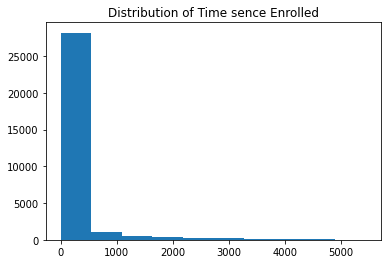

In [131]:
plt.hist(df['time_difference'].dropna())
plt.title('Distribution of Time sence Enrolled')


Text(0.5, 1.0, 'Distribution of Time sence Enrolled')

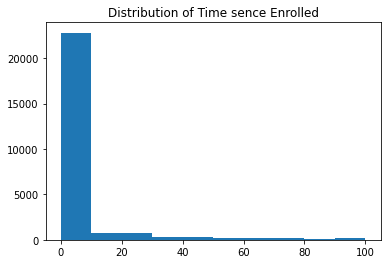

In [132]:
plt.hist(df['time_difference'].dropna(),range=[0,100])
plt.title('Distribution of Time sence Enrolled')

In [133]:
df.loc[df.time_difference>48,'enrolled']=0

In [134]:
df=df.drop(columns=['time_difference','enrolled_date','first_open'])

In [135]:
df

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked
0,235136,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,0
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0
2,254414,1,19,23,"Splash,Cycle,Loan",3,0,1,0,1
3,234192,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,0
4,51549,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
49995,222774,3,13,32,"Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...",13,0,0,1,0
49996,169179,1,0,35,"Cycle,Splash,Home,RewardsContainer",4,0,1,0,0
49997,302367,2,22,39,"joinscreen,product_review,product_review2,Scan...",25,0,0,0,0
49998,324905,6,12,27,"Cycle,Home,product_review,product_review,produ...",26,0,0,1,0


In [136]:
top_screens= pd.read_csv('C:/Users/SIDY BOY!/Desktop/UTD/Projects/practicing ML/top_screens.csv').top_screens.values

In [137]:
top_screens

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [138]:
df['screen_list']= df.screen_list.astype(str)+','

In [139]:
df['screen_list']

0        idscreen,joinscreen,Cycle,product_review,ScanP...
1        joinscreen,product_review,product_review2,Scan...
2                                       Splash,Cycle,Loan,
3        product_review,Home,product_review,Loan3,Finan...
4        idscreen,joinscreen,Cycle,Credit3Container,Sca...
                               ...                        
49995    Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...
49996                  Cycle,Splash,Home,RewardsContainer,
49997    joinscreen,product_review,product_review2,Scan...
49998    Cycle,Home,product_review,product_review,produ...
49999    product_review,ScanPreview,VerifyDateOfBirth,V...
Name: screen_list, Length: 50000, dtype: object

In [140]:
for i in top_screens:
    df[i]= df.screen_list.str.contains(i).astype(int)
    df['screen_list']= df.screen_list.str.replace(i+',','')
    

In [141]:
df['screen_list']

0        joinscreen,product_review,ScanPreview,VerifyTo...
1        joinscreen,product_review,product_review2,Scan...
2                                                         
3        product_review,Home,product_review,ReferralCon...
4        joinscreen,ScanPreview,VerifySSN,Home,SelectIn...
                               ...                        
49995    Home,ScanPreview,VerifySSN,product_review,prod...
49996                                                Home,
49997    joinscreen,product_review,product_review2,Scan...
49998    Home,product_review,product_review,product_rev...
49999    product_review,ScanPreview,ProfileVerifySSN,Pr...
Name: screen_list, Length: 50000, dtype: object

In [142]:
df['other']= df.screen_list.str.count(',')

In [143]:
df=df.drop(columns='screen_list')

In [144]:
df

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,Loan2,...,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,other
0,235136,3,2,23,15,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,7
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,6
4,51549,1,18,31,32,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,3,13,32,13,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,6
49996,169179,1,0,35,4,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
49997,302367,2,22,39,25,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
49998,324905,6,12,27,26,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,13


In [145]:
# Funnels
savings_screens = ["Saving1",
                    "Saving2",
                    "Saving2Amount",
                    "Saving4",
                    "Saving5",
                    "Saving6",
                    "Saving7",
                    "Saving8",
                    "Saving9",
                    "Saving10"]
df["SavingCount"] = df[savings_screens].sum(axis=1)
df = df.drop(columns=savings_screens)

cm_screens = ["Credit1",
               "Credit2",
               "Credit3",
               "Credit3Container",
               "Credit3Dashboard"]
df["CMCount"] = df[cm_screens].sum(axis=1)
df = df.drop(columns=cm_screens)

cc_screens = ["CC1",
                "CC1Category",
                "CC3"]
df["CCCount"] = df[cc_screens].sum(axis=1)
df = df.drop(columns=cc_screens)

loan_screens = ["Loan",
               "Loan2",
               "Loan3",
               "Loan4"]
df["LoansCount"] = df[loan_screens].sum(axis=1)
df = df.drop(columns=loan_screens)

# data pre-processing

In [146]:
y= df['enrolled']
dataset= df.drop(columns='enrolled')

In [147]:
dataset

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked,location,Institutions,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,other,SavingCount,CMCount,CCCount,LoansCount
0,235136,3,2,23,15,0,0,0,0,0,...,0,0,0,0,0,7,0,0,0,1
1,333588,6,1,24,13,0,0,0,1,1,...,0,0,0,0,0,5,0,0,0,1
2,254414,1,19,23,3,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,28,40,0,0,0,1,0,...,0,0,0,0,0,6,0,3,0,1
4,51549,1,18,31,32,0,0,1,0,1,...,0,0,0,0,0,10,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,3,13,32,13,0,0,0,0,0,...,0,0,0,0,0,6,0,2,0,0
49996,169179,1,0,35,4,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
49997,302367,2,22,39,25,0,0,0,1,0,...,0,0,0,0,0,6,0,0,0,0
49998,324905,6,12,27,26,0,0,0,1,0,...,0,0,0,0,0,13,0,0,0,0


In [148]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(dataset,y, test_size=0.2, random_state=0)

In [149]:
train_identifier= X_train['user']
X_train= X_train.drop(columns = 'user')

In [150]:
test_identifier= X_test['user']
X_test= X_test.drop(columns='user')

## scaling the dataset

In [151]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

In [152]:
#from sklearn.preprocessing import MinMaxScaler
#sc= MinMaxScaler()

In [153]:
scaled_X_train= pd.DataFrame(sc.fit_transform(X_train))
scaled_X_test= pd.DataFrame(sc.transform(X_test))

In [154]:
scaled_X_test

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,-1.489818,-1.553579,0.856728,0.819520,-0.346830,-0.457453,2.246319,0.962262,-0.644848,0.950046,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,1.296641,-0.260877,-0.763372,-0.289185,-1.165789
1,0.972325,-0.881364,-0.528611,0.564865,-0.346830,-0.457453,-0.445173,0.962262,-0.644848,0.950046,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,0.753543,-0.260877,-0.763372,-0.289185,0.309800
2,-1.489818,0.328622,0.487305,-0.644744,-0.346830,2.186018,-0.445173,-1.039218,-0.644848,-1.052581,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,-0.332655,-0.260877,0.057524,-0.289185,1.785389
3,0.972325,0.866394,-0.990390,-0.517417,-0.346830,-0.457453,2.246319,-1.039218,-0.644848,0.950046,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,0.481993,-0.260877,-0.763372,-0.289185,-1.165789
4,0.972325,-1.553579,-0.159187,0.692193,-0.346830,-0.457453,-0.445173,-1.039218,-0.644848,0.950046,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,-0.604204,1.857638,-0.763372,2.962372,-1.165789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.997389,1.269723,0.672016,0.628529,-0.346830,-0.457453,-0.445173,0.962262,-0.644848,0.950046,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,0.210444,-0.260877,-0.763372,-0.289185,0.309800
9996,-1.489818,-0.074707,0.210237,-0.390089,-0.346830,-0.457453,-0.445173,-1.039218,-0.644848,0.950046,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,0.753543,-0.260877,-0.763372,-0.289185,0.309800
9997,0.972325,0.597508,-0.436255,2.984084,-0.346830,-0.457453,2.246319,-1.039218,1.550753,-1.052581,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,-0.332655,-0.260877,1.699317,2.962372,1.785389
9998,-0.997389,-1.284693,-0.990390,0.246547,-0.346830,-0.457453,-0.445173,0.962262,-0.644848,0.950046,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,0.753543,-0.260877,-0.763372,-0.289185,-1.165789


In [155]:
scaled_X_train.columns= X_train.columns.values
scaled_X_test.columns= X_test.columns.values
scaled_X_train.index= X_train.index.values
scaled_X_test.index= X_test.index.values

In [156]:
scaled_X_train

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked,location,Institutions,VerifyPhone,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,other,SavingCount,CMCount,CCCount,LoansCount
20330,-0.504961,1.000837,0.025525,-1.026726,-0.346830,2.186018,2.246319,-1.039218,-0.644848,-1.052581,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,-1.147303,-0.260877,-0.763372,-0.289185,1.785389
17532,-0.997389,1.135280,-0.898034,1.328829,2.883254,-0.457453,-0.445173,0.962262,1.550753,0.950046,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,1.839740,-0.260877,0.057524,-0.289185,0.309800
45819,-1.489818,-1.150250,-0.528611,4.066366,2.883254,-0.457453,-0.445173,-1.039218,1.550753,-1.052581,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,1.025092,-0.260877,0.878421,1.336593,1.785389
34807,0.479896,0.059736,-0.620967,0.182883,2.883254,-0.457453,-0.445173,0.962262,-0.644848,-1.052581,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,1.025092,-0.260877,-0.763372,-0.289185,0.309800
31888,-0.012532,0.463065,1.687932,-0.644744,-0.346830,-0.457453,-0.445173,0.962262,-0.644848,0.950046,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,-0.875753,-0.260877,0.878421,-0.289185,-1.165789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21243,0.972325,1.404166,-1.175102,-0.963062,-0.346830,-0.457453,-0.445173,-1.039218,-0.644848,-1.052581,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,-1.147303,-0.260877,-0.763372,-0.289185,-1.165789
45891,-1.489818,0.328622,-0.898034,-1.090390,2.883254,2.186018,-0.445173,-1.039218,-0.644848,-1.052581,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,-1.418852,-0.260877,0.057524,-0.289185,0.309800
42613,-0.012532,-0.881364,-0.620967,1.392493,-0.346830,-0.457453,-0.445173,-1.039218,1.550753,-1.052581,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,-0.604204,3.976153,-0.763372,-0.289185,-1.165789
43567,0.479896,0.059736,-0.436255,-1.090390,2.883254,-0.457453,2.246319,-1.039218,-0.644848,-1.052581,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,-1.147303,-0.260877,-0.763372,-0.289185,-1.165789


# model_buliding

In [157]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(random_state=0, penalty='l1',solver='liblinear')

In [158]:
model.fit(X_train,y_train)

LogisticRegression(penalty='l1', random_state=0, solver='liblinear')

In [159]:
y_pred = model.predict(X_test)

In [160]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score 

<AxesSubplot:>

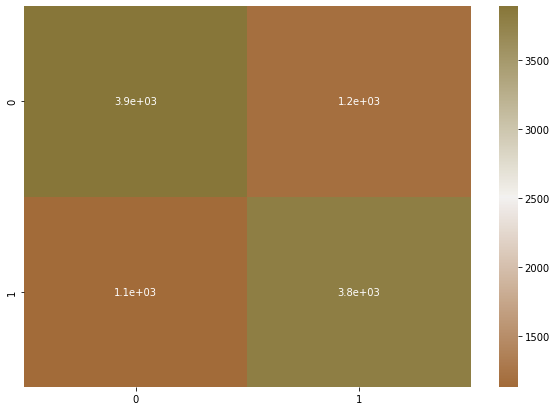

In [161]:
cm= confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True,cmap=sns.diverging_palette(40,70,as_cmap=True))

In [162]:
accuracy_score(y_test,y_pred)


0.7684

In [163]:
recall_score(y_test,y_pred)

0.7700892857142857

In [164]:
precision_score(y_test,y_pred)

0.7623543591803937

## k-folds cross validation

In [165]:
from sklearn.model_selection import cross_val_score
accuracies= cross_val_score(estimator= model, X= X_train, y= y_train, cv=10)
print("Accuracy: %0.3f"% accuracies.mean())

Accuracy: 0.767


## grid search for hyperparameter tuning

In [166]:
from sklearn.linear_model import SGDClassifier

In [167]:
sgd= SGDClassifier(loss= 'log', penalty= 'none', max_iter=10000, random_state= 0)
param_grid={
    'eta0':[.00003,.00001,.0003,.0001,.003,.001,.03,.01,.3,.1],       #learning rate(alpha)
    'learning_rate':['constant'],
    'alpha':[.00003,.00001,.0003,.0001,.003,.001,.03,.01,.3,.1]       #regularization term(lambda)--> C= 1/lambda

    }

In [168]:
from sklearn.model_selection import GridSearchCV
grid= GridSearchCV(sgd, param_grid = param_grid, refit= True, verbose= 4)

In [169]:
grid_fitted = grid.fit(scaled_X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END alpha=3e-05, eta0=3e-05, learning_rate=constant;, score=0.763 total time=   0.1s
[CV 2/5] END alpha=3e-05, eta0=3e-05, learning_rate=constant;, score=0.766 total time=   0.1s
[CV 3/5] END alpha=3e-05, eta0=3e-05, learning_rate=constant;, score=0.762 total time=   0.2s
[CV 4/5] END alpha=3e-05, eta0=3e-05, learning_rate=constant;, score=0.761 total time=   0.1s
[CV 5/5] END alpha=3e-05, eta0=3e-05, learning_rate=constant;, score=0.763 total time=   0.2s
[CV 1/5] END alpha=3e-05, eta0=1e-05, learning_rate=constant;, score=0.756 total time=   0.2s
[CV 2/5] END alpha=3e-05, eta0=1e-05, learning_rate=constant;, score=0.762 total time=   0.2s
[CV 3/5] END alpha=3e-05, eta0=1e-05, learning_rate=constant;, score=0.758 total time=   0.3s
[CV 4/5] END alpha=3e-05, eta0=1e-05, learning_rate=constant;, score=0.757 total time=   0.2s
[CV 5/5] END alpha=3e-05, eta0=1e-05, learning_rate=constant;, score=0.760 total time=   0.

[CV 3/5] END alpha=1e-05, eta0=0.01, learning_rate=constant;, score=0.759 total time=   0.1s
[CV 4/5] END alpha=1e-05, eta0=0.01, learning_rate=constant;, score=0.740 total time=   0.0s
[CV 5/5] END alpha=1e-05, eta0=0.01, learning_rate=constant;, score=0.742 total time=   0.0s
[CV 1/5] END alpha=1e-05, eta0=0.3, learning_rate=constant;, score=0.685 total time=   0.0s
[CV 2/5] END alpha=1e-05, eta0=0.3, learning_rate=constant;, score=0.645 total time=   0.0s
[CV 3/5] END alpha=1e-05, eta0=0.3, learning_rate=constant;, score=0.695 total time=   0.1s
[CV 4/5] END alpha=1e-05, eta0=0.3, learning_rate=constant;, score=0.651 total time=   0.1s
[CV 5/5] END alpha=1e-05, eta0=0.3, learning_rate=constant;, score=0.669 total time=   0.0s
[CV 1/5] END alpha=1e-05, eta0=0.1, learning_rate=constant;, score=0.699 total time=   0.0s
[CV 2/5] END alpha=1e-05, eta0=0.1, learning_rate=constant;, score=0.696 total time=   0.0s
[CV 3/5] END alpha=1e-05, eta0=0.1, learning_rate=constant;, score=0.739 tota

[CV 1/5] END alpha=0.0001, eta0=0.001, learning_rate=constant;, score=0.768 total time=   0.0s
[CV 2/5] END alpha=0.0001, eta0=0.001, learning_rate=constant;, score=0.767 total time=   0.0s
[CV 3/5] END alpha=0.0001, eta0=0.001, learning_rate=constant;, score=0.764 total time=   0.0s
[CV 4/5] END alpha=0.0001, eta0=0.001, learning_rate=constant;, score=0.764 total time=   0.0s
[CV 5/5] END alpha=0.0001, eta0=0.001, learning_rate=constant;, score=0.764 total time=   0.0s
[CV 1/5] END alpha=0.0001, eta0=0.03, learning_rate=constant;, score=0.732 total time=   0.0s
[CV 2/5] END alpha=0.0001, eta0=0.03, learning_rate=constant;, score=0.739 total time=   0.0s
[CV 3/5] END alpha=0.0001, eta0=0.03, learning_rate=constant;, score=0.743 total time=   0.1s
[CV 4/5] END alpha=0.0001, eta0=0.03, learning_rate=constant;, score=0.693 total time=   0.0s
[CV 5/5] END alpha=0.0001, eta0=0.03, learning_rate=constant;, score=0.706 total time=   0.0s
[CV 1/5] END alpha=0.0001, eta0=0.01, learning_rate=con

[CV 4/5] END alpha=0.001, eta0=0.0003, learning_rate=constant;, score=0.764 total time=   0.1s
[CV 5/5] END alpha=0.001, eta0=0.0003, learning_rate=constant;, score=0.764 total time=   0.0s
[CV 1/5] END alpha=0.001, eta0=0.0001, learning_rate=constant;, score=0.769 total time=   0.1s
[CV 2/5] END alpha=0.001, eta0=0.0001, learning_rate=constant;, score=0.770 total time=   0.0s
[CV 3/5] END alpha=0.001, eta0=0.0001, learning_rate=constant;, score=0.762 total time=   0.1s
[CV 4/5] END alpha=0.001, eta0=0.0001, learning_rate=constant;, score=0.762 total time=   0.1s
[CV 5/5] END alpha=0.001, eta0=0.0001, learning_rate=constant;, score=0.765 total time=   0.0s
[CV 1/5] END alpha=0.001, eta0=0.003, learning_rate=constant;, score=0.762 total time=   0.0s
[CV 2/5] END alpha=0.001, eta0=0.003, learning_rate=constant;, score=0.765 total time=   0.0s
[CV 3/5] END alpha=0.001, eta0=0.003, learning_rate=constant;, score=0.764 total time=   0.0s
[CV 4/5] END alpha=0.001, eta0=0.003, learning_rate=c

[CV 3/5] END alpha=0.01, eta0=3e-05, learning_rate=constant;, score=0.762 total time=   0.1s
[CV 4/5] END alpha=0.01, eta0=3e-05, learning_rate=constant;, score=0.761 total time=   0.1s
[CV 5/5] END alpha=0.01, eta0=3e-05, learning_rate=constant;, score=0.763 total time=   0.1s
[CV 1/5] END alpha=0.01, eta0=1e-05, learning_rate=constant;, score=0.756 total time=   0.2s
[CV 2/5] END alpha=0.01, eta0=1e-05, learning_rate=constant;, score=0.762 total time=   0.2s
[CV 3/5] END alpha=0.01, eta0=1e-05, learning_rate=constant;, score=0.758 total time=   0.2s
[CV 4/5] END alpha=0.01, eta0=1e-05, learning_rate=constant;, score=0.757 total time=   0.2s
[CV 5/5] END alpha=0.01, eta0=1e-05, learning_rate=constant;, score=0.760 total time=   0.2s
[CV 1/5] END alpha=0.01, eta0=0.0003, learning_rate=constant;, score=0.767 total time=   0.0s
[CV 2/5] END alpha=0.01, eta0=0.0003, learning_rate=constant;, score=0.771 total time=   0.0s
[CV 3/5] END alpha=0.01, eta0=0.0003, learning_rate=constant;, score

[CV 3/5] END alpha=0.3, eta0=0.3, learning_rate=constant;, score=0.695 total time=   0.1s
[CV 4/5] END alpha=0.3, eta0=0.3, learning_rate=constant;, score=0.651 total time=   0.1s
[CV 5/5] END alpha=0.3, eta0=0.3, learning_rate=constant;, score=0.669 total time=   0.0s
[CV 1/5] END alpha=0.3, eta0=0.1, learning_rate=constant;, score=0.699 total time=   0.0s
[CV 2/5] END alpha=0.3, eta0=0.1, learning_rate=constant;, score=0.696 total time=   0.0s
[CV 3/5] END alpha=0.3, eta0=0.1, learning_rate=constant;, score=0.739 total time=   0.0s
[CV 4/5] END alpha=0.3, eta0=0.1, learning_rate=constant;, score=0.619 total time=   0.0s
[CV 5/5] END alpha=0.3, eta0=0.1, learning_rate=constant;, score=0.609 total time=   0.0s
[CV 1/5] END alpha=0.1, eta0=3e-05, learning_rate=constant;, score=0.763 total time=   0.1s
[CV 2/5] END alpha=0.1, eta0=3e-05, learning_rate=constant;, score=0.766 total time=   0.1s
[CV 3/5] END alpha=0.1, eta0=3e-05, learning_rate=constant;, score=0.762 total time=   0.1s
[CV 

In [170]:
grid_fitted.best_params_

{'alpha': 3e-05, 'eta0': 0.0003, 'learning_rate': 'constant'}

In [171]:
grid_predict= grid_fitted.predict(scaled_X_test)

In [172]:
cm_grid_sgd= confusion_matrix(y_test,grid_predict)

<AxesSubplot:>

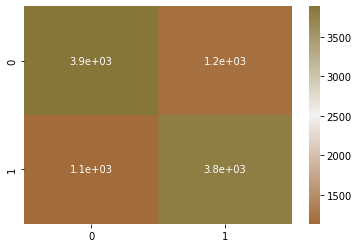

In [173]:
sns.heatmap(cm, annot=True,cmap=sns.diverging_palette(40,70,as_cmap=True))

In [174]:
accuracy_score(y_test,grid_predict)

0.7687

In [175]:
precision_score(y_test,grid_predict)

0.7620765684505914

In [176]:
recall_score(y_test,grid_predict)

0.7715097402597403

In [177]:
final_results= pd.concat([y_test, test_identifier],axis=1).dropna()


In [178]:
final_results

,enrolled,user
11841,1,239786
19602,1,279644
45519,0,98290
25747,1,170150
42642,1,237568
...,...,...
25091,1,143036
27853,1,91158
47278,0,248318
37020,1,142418


In [179]:
final_results['predicted results with grid search']= grid_predict

In [180]:
final_results

,enrolled,user,predicted results with grid search
11841,1,239786,1
19602,1,279644,1
45519,0,98290,0
25747,1,170150,1
42642,1,237568,1
...,...,...,...
25091,1,143036,0
27853,1,91158,1
47278,0,248318,0
37020,1,142418,1


In [181]:
final_results['predicted results without grid search']= y_pred

In [182]:
final_results

,enrolled,user,predicted results with grid search,predicted results without grid search
11841,1,239786,1,1
19602,1,279644,1,1
45519,0,98290,0,0
25747,1,170150,1,1
42642,1,237568,1,1
...,...,...,...,...
25091,1,143036,0,0
27853,1,91158,1,1
47278,0,248318,0,0
37020,1,142418,1,1


In [187]:
 final_results[['user','enrolled','predicted results with grid search','predicted results without grid search']].reset_index(drop= True)

,user,enrolled,predicted results with grid search,predicted results without grid search
0,239786,1,1,1
1,279644,1,1,1
2,98290,0,0,0
3,170150,1,1,1
4,237568,1,1,1
...,...,...,...,...
9995,143036,1,0,0
9996,91158,1,1,1
9997,248318,0,0,0
9998,142418,1,1,1
